# Salma TADLAOUI

1. Based on the basic examples provided in Google Colab, explore the gold
data in general, and pick a time series to work on (typically ”closing”
column)

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
#read the dataset
csv_path = "/content/Gold Price.csv"
data = pd.read_csv(csv_path)

In [5]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [6]:
data.index = pd.to_datetime(data['Date'], format='%Y.%m.%d %H:%M:%S')

In [7]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
Date,,,,,,,
2014-01-01,2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [8]:
data.describe()

,Price,Open,High,Low,Volume,Chg%
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,35217.900763,35222.369106,35417.074540,35019.329591,13508.495734,0.029070
std,8964.037211,8971.608761,9032.667462,8893.063733,11314.007396,0.857102
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,28554.500000,28531.000000,28659.000000,28417.500000,6680.000000,-0.400000
50%,30766.000000,30738.000000,30906.000000,30610.000000,11490.000000,0.020000
75%,45942.500000,45876.500000,46242.500000,45522.500000,17910.000000,0.460000
max,56117.000000,56351.000000,56499.000000,55400.000000,106920.000000,5.300000


In [27]:
fig = px.line(data, y=['Volume', 'Price', 'Open', 'High', 'Low'],
              title='Trend of all Variables')
fig.show()

2. Build and compile a simple LSTM model with the following character-
istics:


*  One LSTM cell containing 64 units
*  Hidden layer with 8 units
* Output layer







In [28]:
window_size = 5

model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
from sklearn.model_selection import train_test_split
def get_XY(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        targets.append(data[i + window_size])
    return np.array(sequences), np.array(targets)


X, Y = get_XY(data['Price'].values, window_size)

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.reshape(-1, 1)).flatten()



* Partition the data into 80% training (30% of which is reserved for
validation step) and the remaining 20% for testing

In [34]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

* Reshape the data into sequences (samples × window size × 1)

In [35]:
X_train = X_train.reshape(-1, window_size, 1)
X_val = X_val.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

print('Shape of Training set is ', X_train.shape, Y_train.shape)
print('Shape of Validation set is ', X_val.shape, Y_val.shape)
print('Shape of Testing set is ', X_test.shape, Y_test.shape)

Shape of Training set is  (1243, 5, 1) (1243,)
Shape of Validation set is  (534, 5, 1) (534,)
Shape of Testing set is  (445, 5, 1) (445,)


* Train and test the model. Visualize the predictions with the actual
values.

In [36]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
39/39 [==============================] - 3s 22ms/step - loss: 0.0348 - val_loss: 0.0040
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 3.9298e-04
Epoch 3/10
39/39 [==============================] - 0s 7ms/step - loss: 3.4396e-04 - val_loss: 3.4412e-04
Epoch 4/10
39/39 [==============================] - 0s 8ms/step - loss: 3.1431e-04 - val_loss: 3.4329e-04
Epoch 5/10
39/39 [==============================] - 0s 7ms/step - loss: 3.0781e-04 - val_loss: 3.2526e-04
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 3.0571e-04 - val_loss: 3.5678e-04
Epoch 7/10
39/39 [==============================] - 0s 7ms/step - loss: 3.0151e-04 - val_loss: 3.1681e-04
Epoch 8/10
39/39 [==============================] - 0s 7ms/step - loss: 2.8690e-04 - val_loss: 2.9909e-04
Epoch 9/10
39/39 [==============================] - 0s 7ms/step - loss: 2.7871e-04 - val_loss: 3.0742e-04
Epoch 10/10
39/39 [==============================] - 0s 6

In [37]:
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()
train_predict = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_train})
train_predict

14/14 [==============================] - 0s 4ms/step


,Train Predictions,Actuals
0,0.045278,0.033542
1,0.125596,0.107912
2,0.139901,0.138445
3,0.165408,0.158495
4,0.701878,0.715317
...,...,...
1238,0.836193,0.808248
1239,0.127444,0.118776
1240,0.074054,0.060402
1241,0.031678,0.022393


In [38]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(18, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')

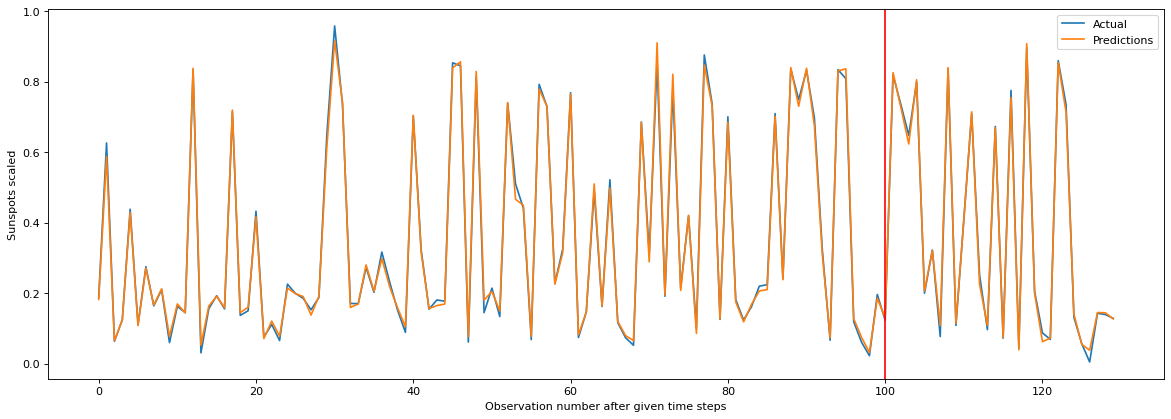

In [39]:
plot_result(Y_train[-100:], Y_test[:30], train_predictions[-100:], test_predictions[:30])

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))

MAE: 0.010813271017034738
MSE: 0.00022331561936215496
RMSE: 0.014943748504379848
